### **ABOUT THE DATASET:**
EEG eye state refers to the classification of a person's eye state(Open or closed) which uses electroencephalogrpahy(EEG) data. These raw numerical values helps to understand the brain activity through the EEG records. It records the combined electrical activity of neuron populations underneath each electrode. The dataset has continuous EEG measurement with the Emotiv EEG Neuroheadset. Emotiv devices measure EEG signals with a 16-but resolution. One Emotiv unit is about 1.95 microvolt(approximately) of brain electrical activity recorded at the scalp or surface of the head


All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.


### **Features:**

AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, and AF4 are names of EEG electrodes positioned according to the International 10-20 or 10-10 System, a standardized method for placing electrodes on the scalp to record electrical activity from various regions of the brain.

The letters correspond to specific brain regions:

**Fp:** Frontal pole (very front of the head)

**F:** Frontal lobe

**C:** Central (along the midline, over the motor cortex)

**T:** Temporal lobe

**P:** Parietal lobe

**O:** Occipital lobe

**AF:** Anterior frontal (between Fp and F)

**FC:** Frontal-central (between F and C)


The numbers with the corresponding letters  indicate the hemisphere and distance from the midline:

Odd numbers (1, 3, 5, 7) indicate positions on the left side of the scalp.

Even numbers (2, 4, 6, 8) indicate positions on the right side.

‘z’ (zero) denotes a midline position.


**For example:**

**AF3** is located at the left anterior frontal region.

**F7** is at the left anterior frontal area, overlying the temporal region.

**FC5** is situated between the frontal and central areas on the left.

**T7** is at the left mid-temporal region, near the ear.

**P7** is a left parietal electrode.

**O1** is on the left occipital lobe.

**F8** is in the right frontal area, near the temporal lobe.

These electrode labels are used to ensure reproducibility and consistency in EEG measurements, enabling researchers or clinicians to relate electrical signals to particular brain regions


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats


In [7]:
from scipy.io import arff
data = arff.loadarff('/content/EEG Eye State.arff')
data= pd.DataFrame(data[0])
data.head()


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


It is an ARFF file, it was converted into CSV above.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  object 
dtypes: float64(14), object(1)
memory usage: 1.7+ MB


In [9]:
data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


# DATA CLEANING

In [10]:
missing_values = data.isnull().sum()


print(missing_values)

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64


No missing values here

In [11]:
duplicate = data[data.duplicated()]
duplicate

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection


No duplicate value was found

**BEFORE REMOVING OUTLIERS**

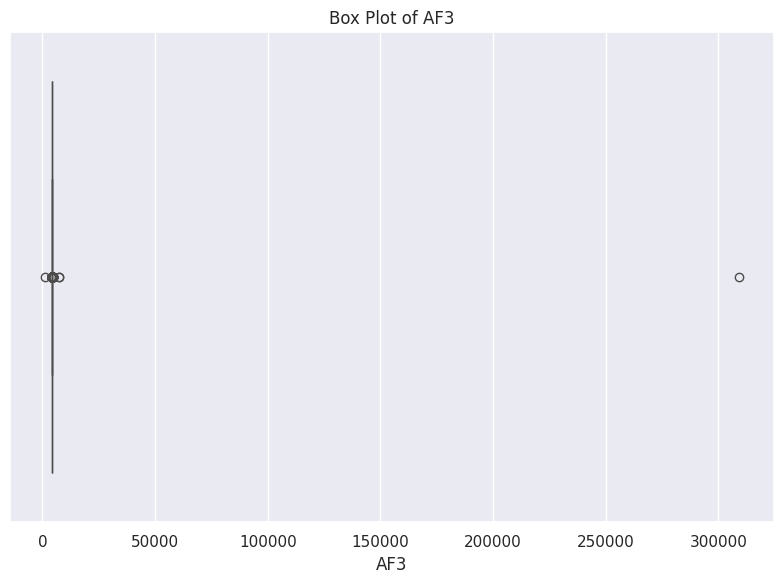

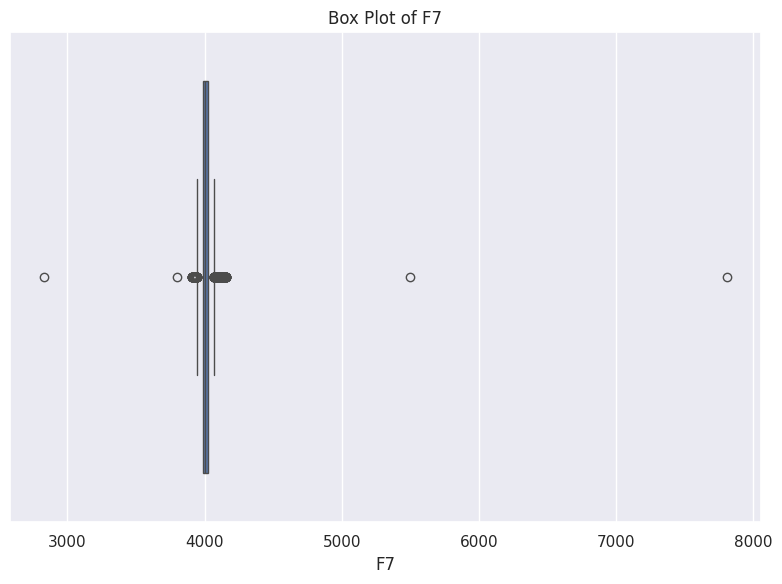

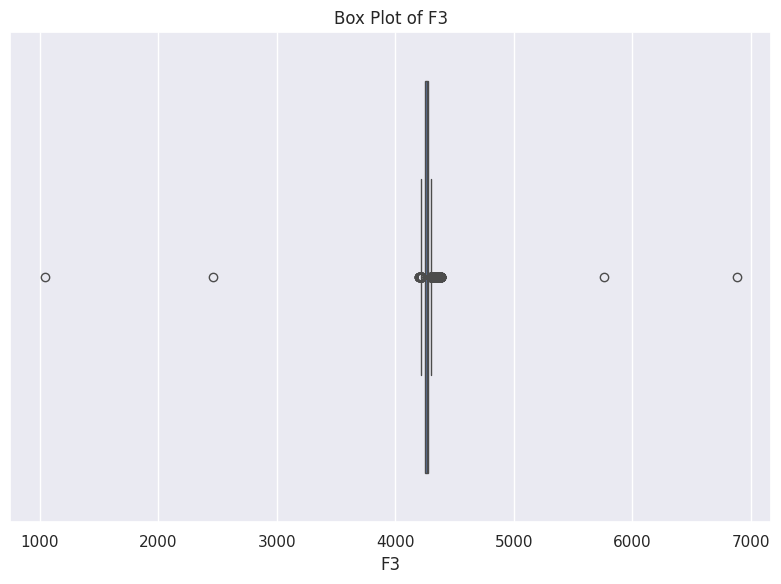

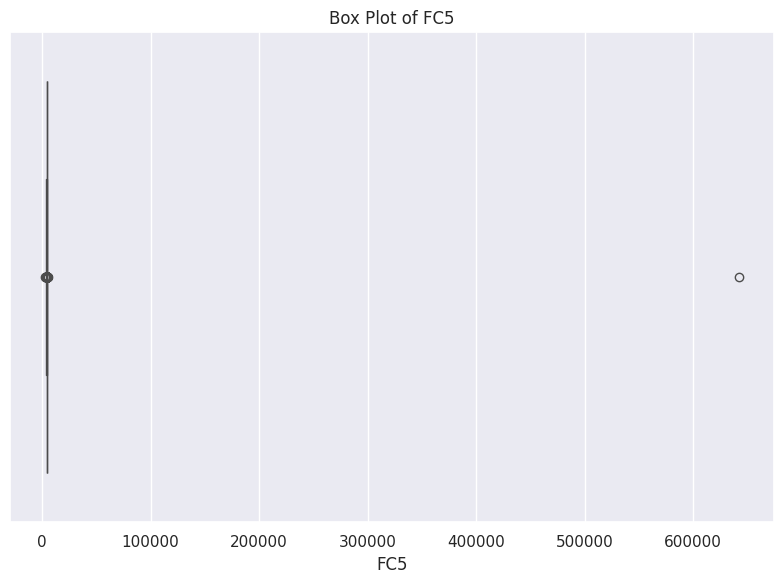

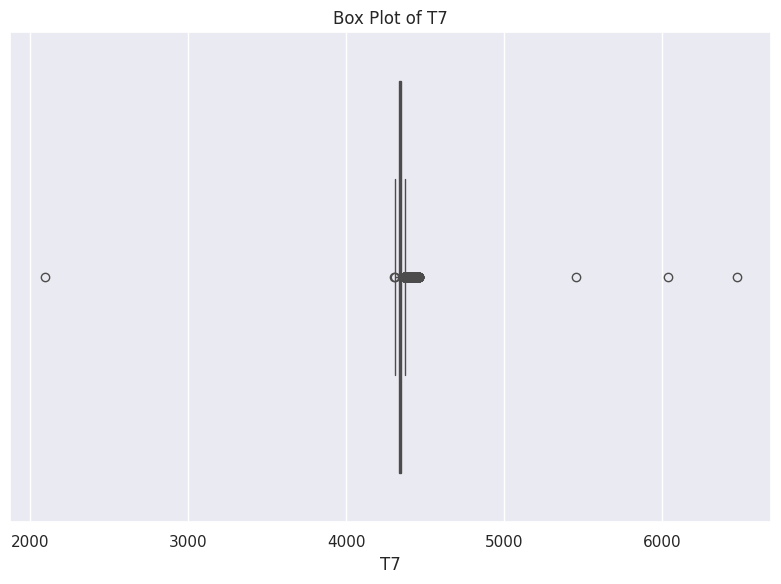

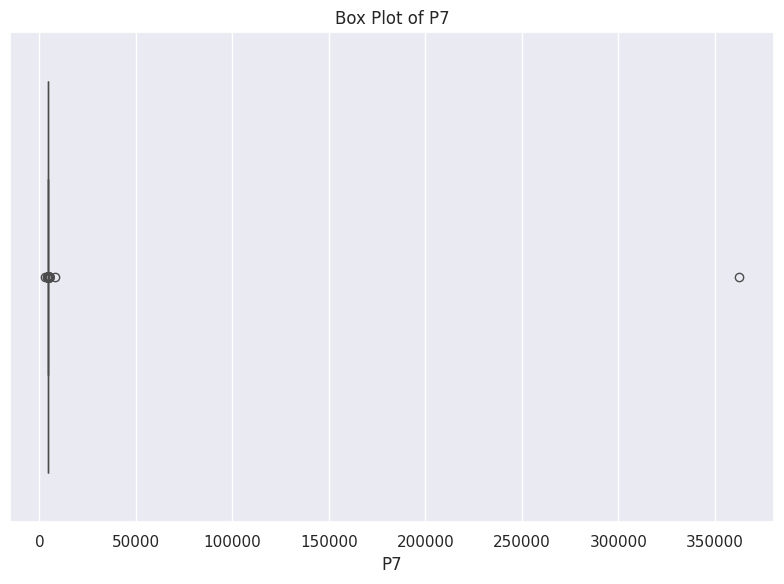

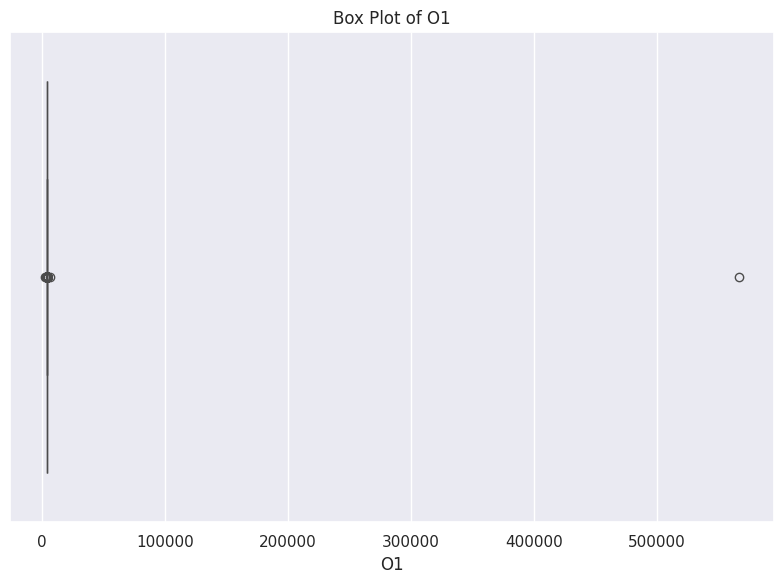

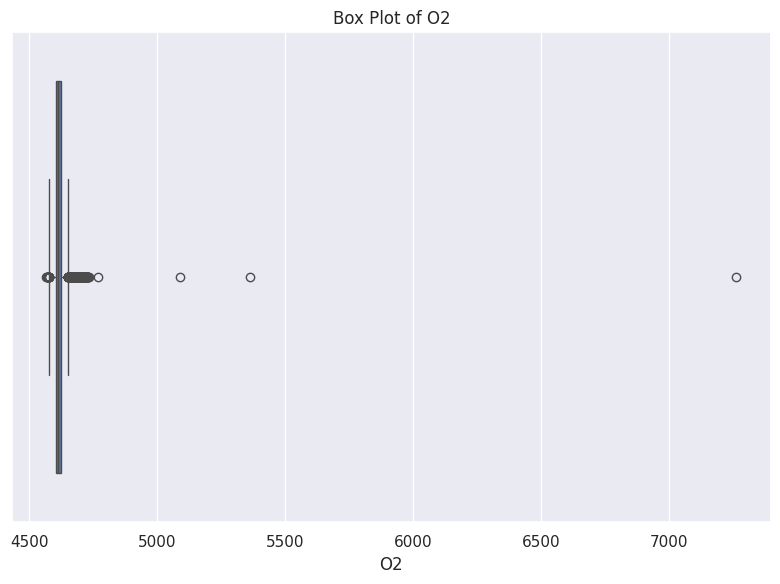

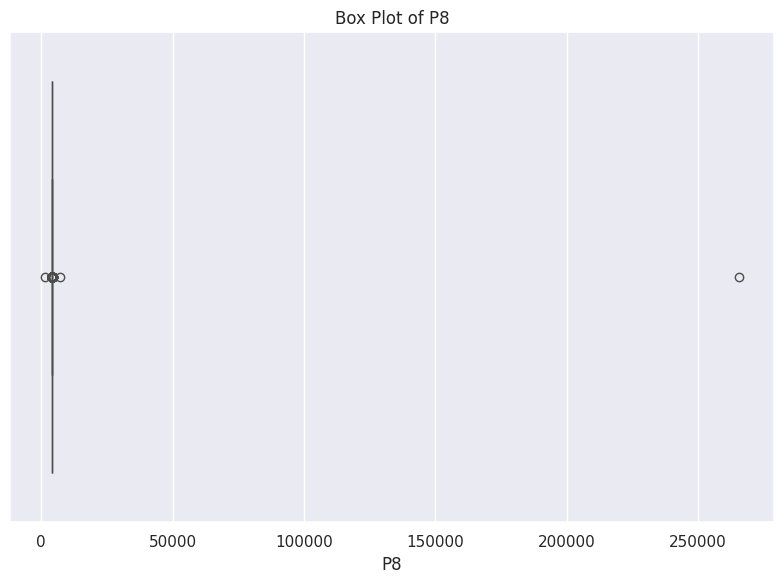

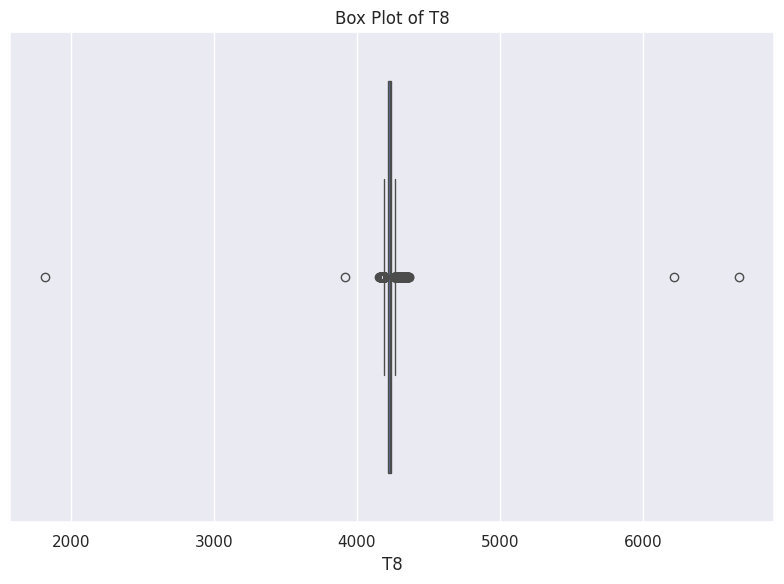

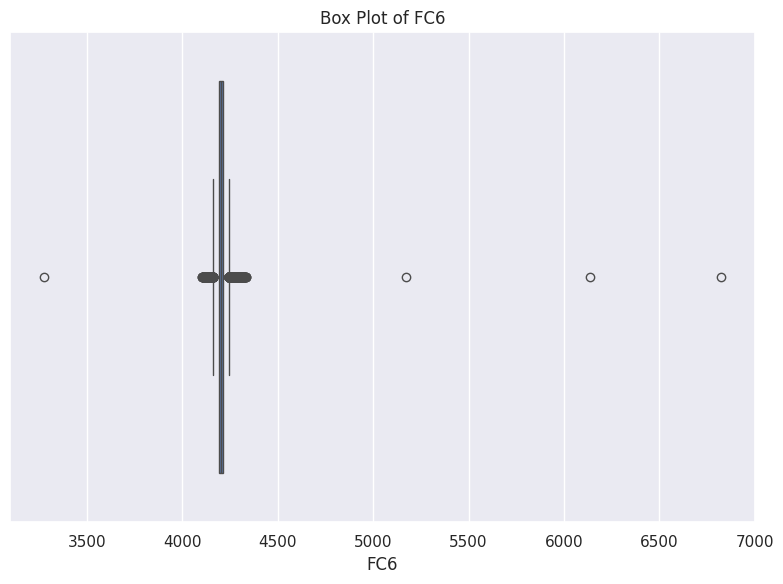

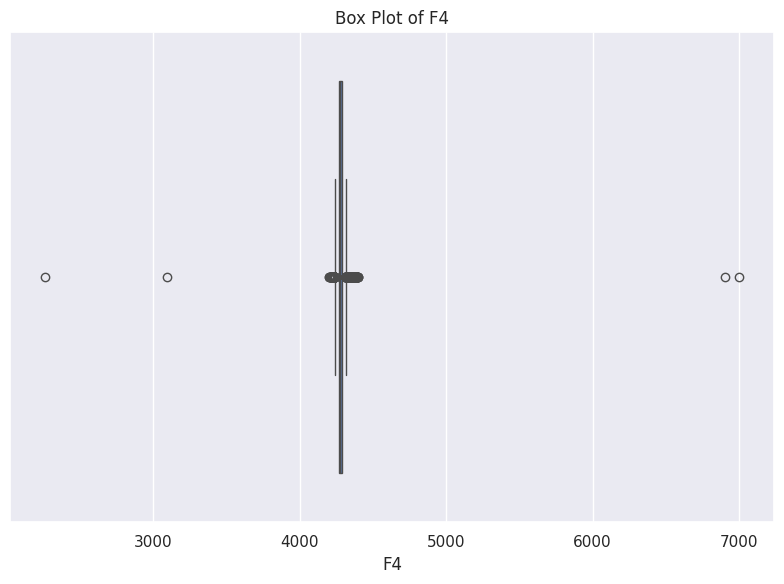

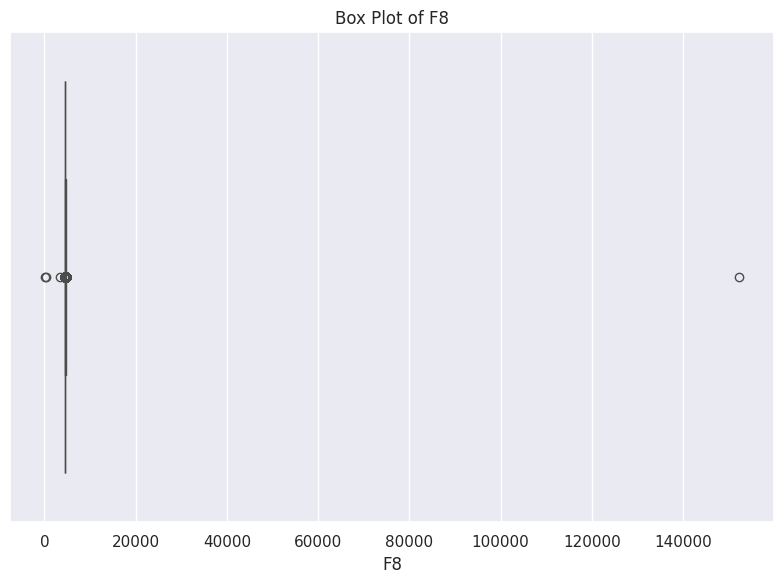

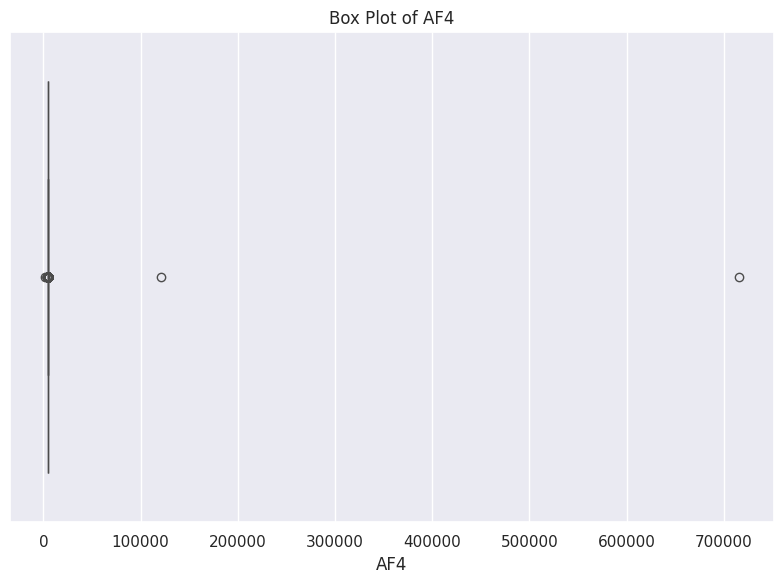

In [12]:
numerical_features = data.select_dtypes(include=['number'])

for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

In [13]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered


for column in numerical_features.columns:
  data = remove_outliers_iqr(data, column)

### **After removing outliers**

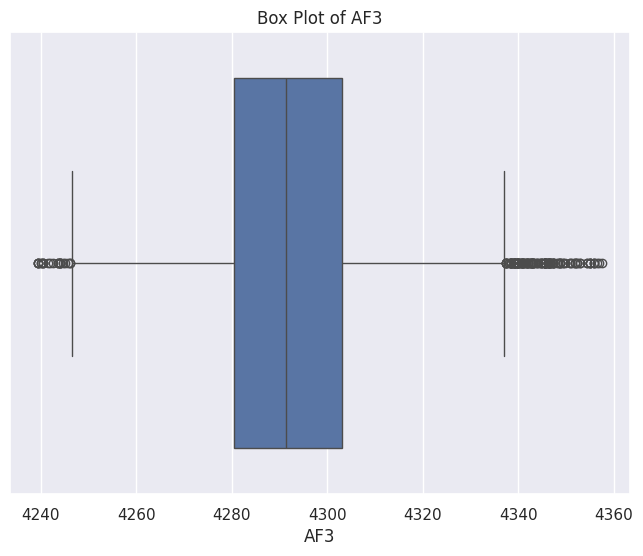

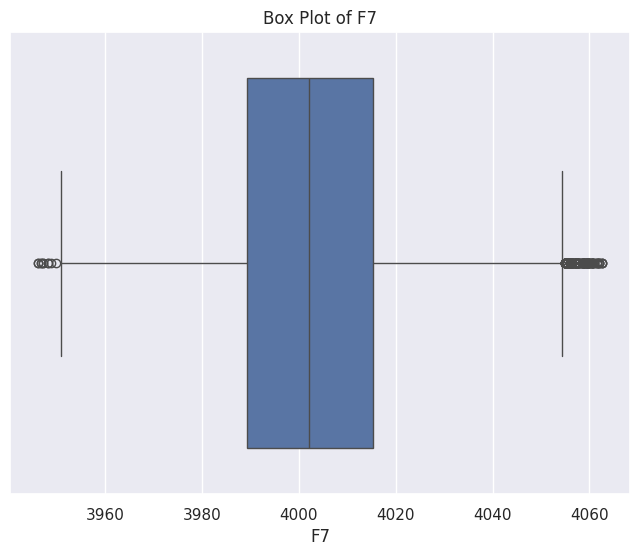

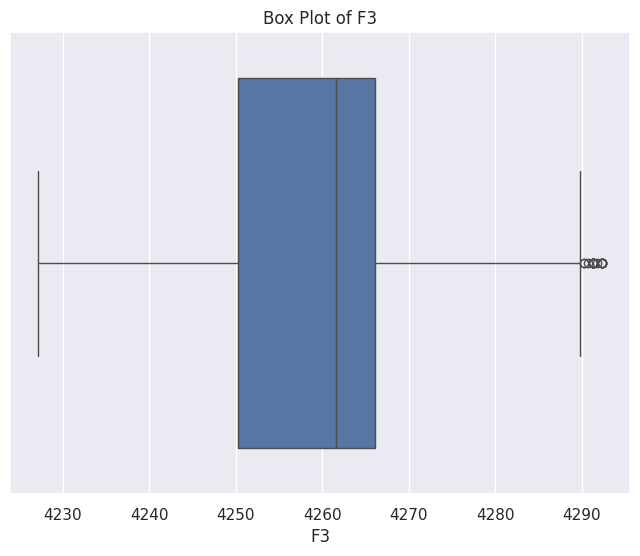

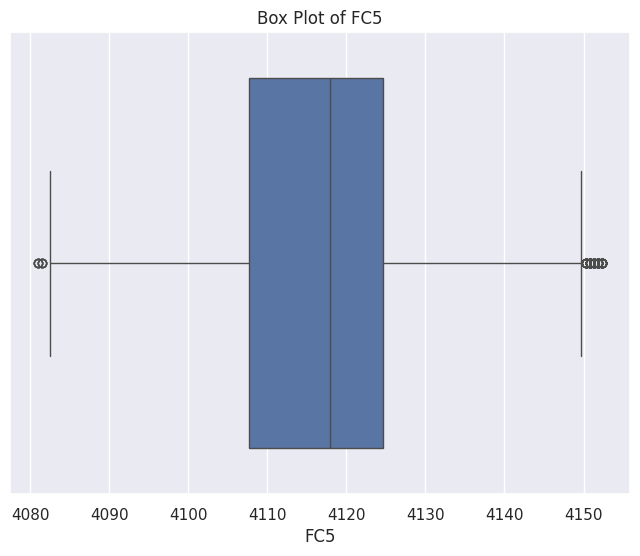

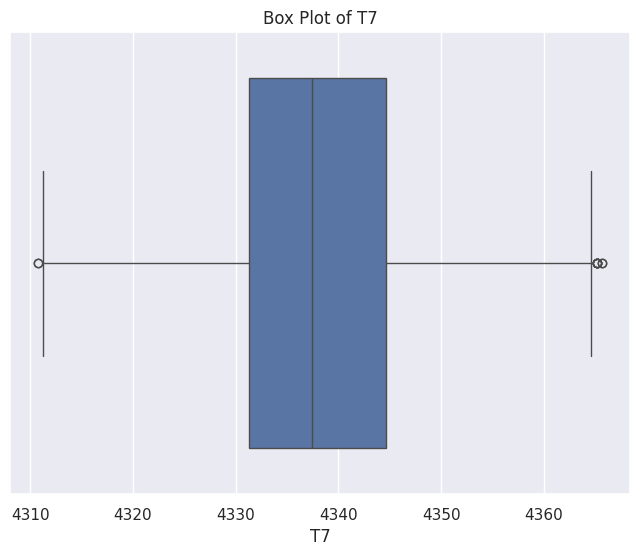

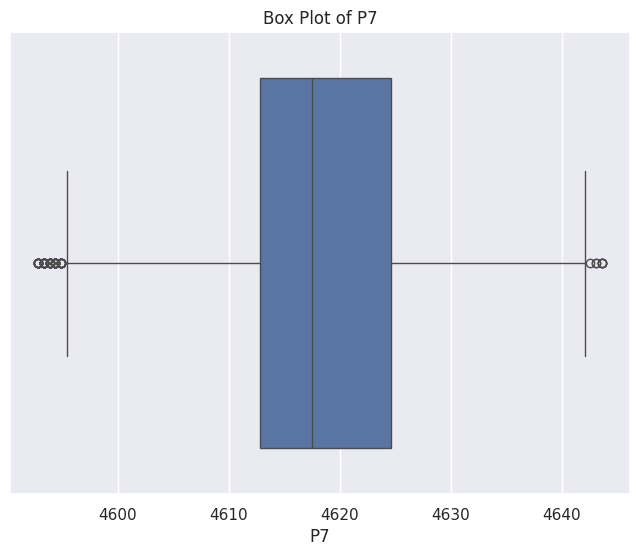

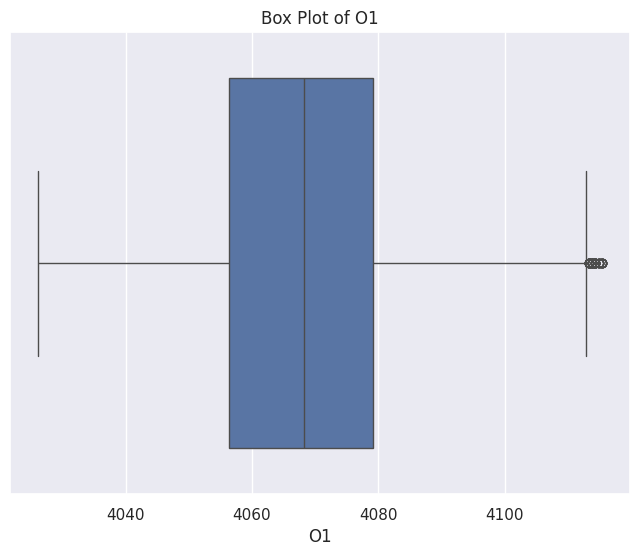

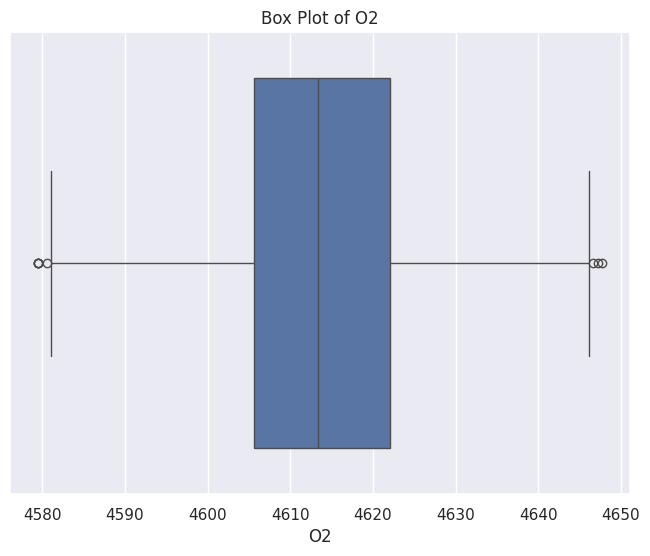

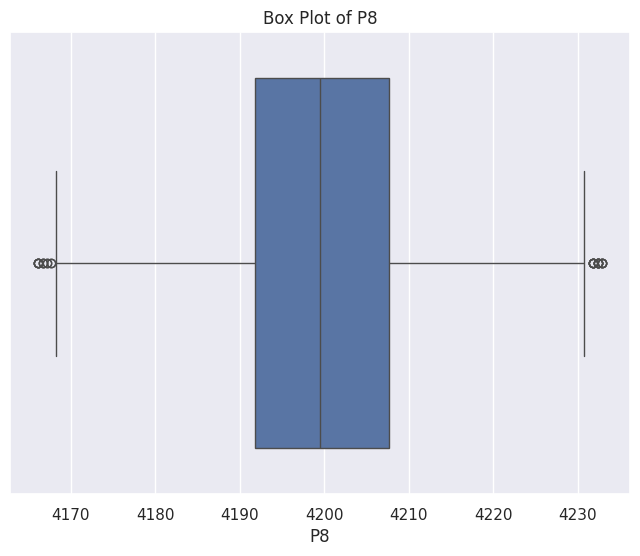

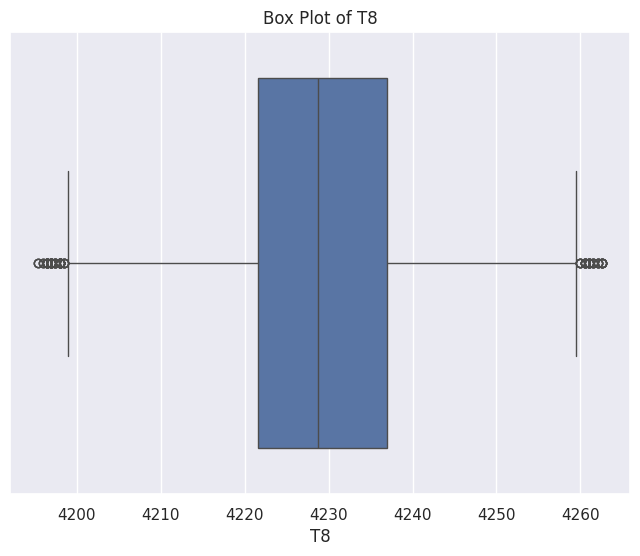

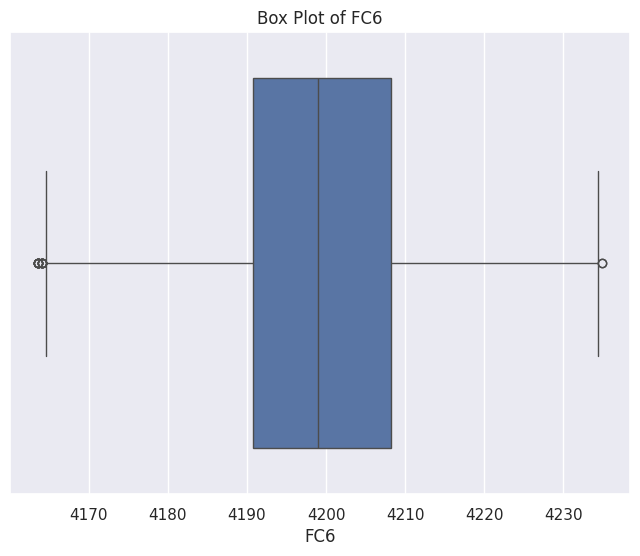

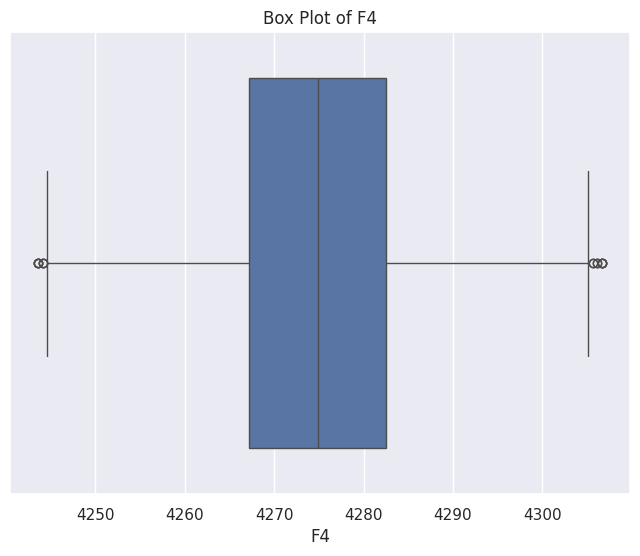

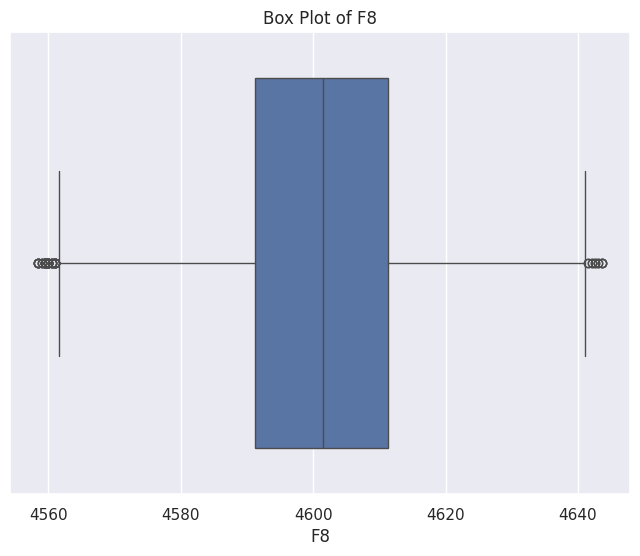

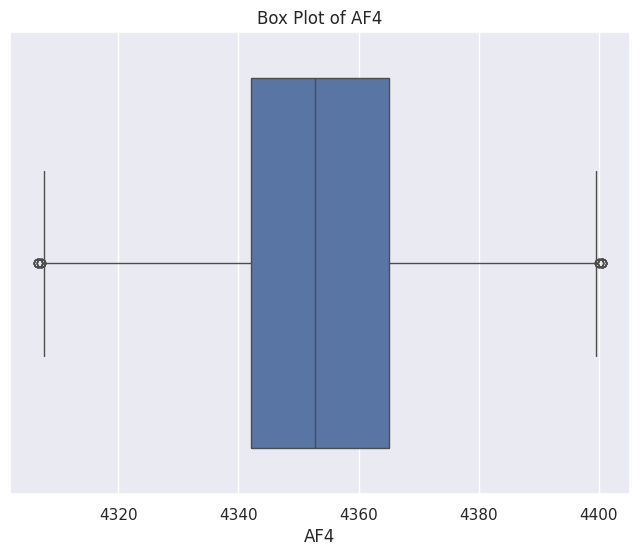

In [14]:
numerical_features = data.select_dtypes(include=['number'])


for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

### **Label Encoding**

In [15]:
unique_eyeDetection = data['eyeDetection'].unique()


print(unique_eyeDetection)

[b'0' b'1']


In [16]:
air_eyeDetection = {
    b'0': 0,
    b'1': 1

}

data['eyeDetection encoded'] = data['eyeDetection'].map(air_eyeDetection)

In [17]:
data = data.drop('eyeDetection', axis=1)

In [18]:
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection encoded
50,4305.13,4008.72,4259.49,4120.00,4341.03,4595.90,4092.82,4612.31,4199.49,4219.49,4198.46,4261.03,4611.79,4357.95,0
51,4293.33,3994.87,4254.36,4116.41,4337.44,4596.41,4092.31,4609.74,4193.33,4211.79,4186.67,4252.82,4597.95,4347.69,0
52,4297.44,3994.36,4258.46,4118.97,4336.92,4594.36,4096.92,4614.36,4193.33,4209.74,4192.31,4260.51,4602.05,4350.77,0
53,4308.21,4007.18,4268.21,4126.15,4344.62,4595.38,4102.05,4622.56,4205.13,4221.54,4205.13,4271.79,4614.36,4374.87,0
57,4324.62,4018.97,4276.41,4135.90,4341.54,4600.51,4099.49,4626.15,4211.28,4242.05,4216.41,4276.92,4632.82,4388.72,0


# **CORRELATION MATRIX**

In [19]:
correlation = data.corr()
correlation

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection encoded
AF3,1.000000,0.428308,0.617503,0.419066,0.264011,0.171704,0.254830,0.103781,0.202996,0.404893,0.403021,0.625644,0.499020,0.838345,0.156534
F7,0.428308,1.000000,0.313660,0.524236,0.422025,0.227240,0.154666,-0.134571,0.034206,0.059506,0.119642,0.134276,0.209424,0.228837,-0.063251
F3,0.617503,0.313660,1.000000,0.522997,0.288968,0.262858,0.170683,0.257296,0.250652,0.333014,0.383444,0.645247,0.383898,0.554507,0.063215
FC5,0.419066,0.524236,0.522997,1.000000,0.395772,0.245385,0.079250,-0.016259,0.071994,0.117106,0.194517,0.269823,0.219679,0.258457,-0.051026
T7,0.264011,0.422025,0.288968,0.395772,1.000000,0.596401,0.382296,0.224583,0.268051,0.333290,0.357270,0.189707,0.301410,0.203666,-0.067072
P7,0.171704,0.227240,0.262858,0.245385,0.596401,1.000000,0.505050,0.381454,0.443075,0.440543,0.321738,0.277285,0.282592,0.182438,-0.271852
O1,0.254830,0.154666,0.170683,0.079250,0.382296,0.505050,1.000000,0.359340,0.402476,0.271481,0.275037,0.401653,0.199580,0.291957,-0.053192
O2,0.103781,-0.134571,0.257296,-0.016259,0.224583,0.381454,0.359340,1.000000,0.730893,0.492124,0.388851,0.412771,0.214649,0.225713,0.011988
P8,0.202996,0.034206,0.250652,0.071994,0.268051,0.443075,0.402476,0.730893,1.000000,0.641684,0.448361,0.474809,0.363887,0.284270,-0.041223
T8,0.404893,0.059506,0.333014,0.117106,0.333290,0.440543,0.271481,0.492124,0.641684,1.000000,0.575009,0.537548,0.529059,0.509844,0.018997


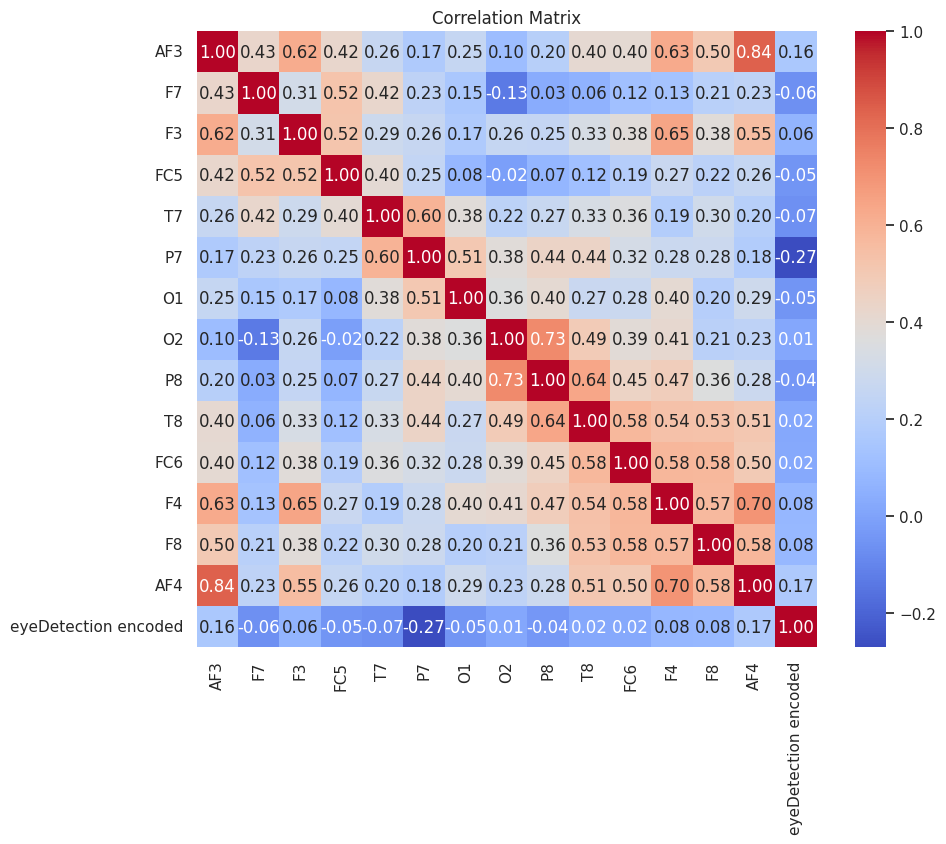

In [20]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10848 entries, 50 to 14979
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AF3                   10848 non-null  float64
 1   F7                    10848 non-null  float64
 2   F3                    10848 non-null  float64
 3   FC5                   10848 non-null  float64
 4   T7                    10848 non-null  float64
 5   P7                    10848 non-null  float64
 6   O1                    10848 non-null  float64
 7   O2                    10848 non-null  float64
 8   P8                    10848 non-null  float64
 9   T8                    10848 non-null  float64
 10  FC6                   10848 non-null  float64
 11  F4                    10848 non-null  float64
 12  F8                    10848 non-null  float64
 13  AF4                   10848 non-null  float64
 14  eyeDetection encoded  10848 non-null  int64  
dtypes: float64(14), int64(1

## **NEURAL NETWORK:**

In [22]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('eyeDetection encoded', axis=1)
y = data['eyeDetection encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8678, 14)
Shape of X_test: (2170, 14)
Shape of y_train: (8678,)
Shape of y_test: (2170,)


In [34]:
model = Sequential()

model.add(Dense(64, input_dim=14, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train.values, y_train.values, batch_size = 128, verbose = 2, epochs = 60)

Epoch 1/60
68/68 - 2s - 23ms/step - acc: 0.5325 - loss: 1.3635
Epoch 2/60
68/68 - 0s - 4ms/step - acc: 0.5652 - loss: 0.7203
Epoch 3/60
68/68 - 0s - 2ms/step - acc: 0.5340 - loss: 0.8161
Epoch 4/60
68/68 - 0s - 4ms/step - acc: 0.5389 - loss: 0.7764
Epoch 5/60
68/68 - 0s - 4ms/step - acc: 0.5478 - loss: 0.7830
Epoch 6/60
68/68 - 0s - 2ms/step - acc: 0.5463 - loss: 0.7650
Epoch 7/60
68/68 - 0s - 4ms/step - acc: 0.5446 - loss: 0.7801
Epoch 8/60
68/68 - 0s - 4ms/step - acc: 0.5520 - loss: 0.7560
Epoch 9/60
68/68 - 0s - 5ms/step - acc: 0.5323 - loss: 0.8580
Epoch 10/60
68/68 - 0s - 4ms/step - acc: 0.5630 - loss: 0.7166
Epoch 11/60
68/68 - 0s - 4ms/step - acc: 0.5333 - loss: 0.8486
Epoch 12/60
68/68 - 0s - 4ms/step - acc: 0.5494 - loss: 0.7861
Epoch 13/60
68/68 - 0s - 4ms/step - acc: 0.5361 - loss: 0.9489
Epoch 14/60
68/68 - 0s - 2ms/step - acc: 0.5287 - loss: 0.8833
Epoch 15/60
68/68 - 0s - 4ms/step - acc: 0.5315 - loss: 0.9242
Epoch 16/60
68/68 - 0s - 4ms/step - acc: 0.5403 - loss: 0.8003


In [41]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
[1 0 1 ... 1 1 1]


# **Evaluation metrics**

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate evaluation metrics
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)
accuracy = accuracy_score(y_test, predict)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.4592
Recall: 0.9193
F1-Score: 0.6124
Accuracy: 0.4885


### As we can see, precision, recall, f-1 score and accuracy is quite imbalanced here. Few combinations of batch size and epochs were tried and still there was not much improvement, so in the next segment we implemet feature scaling to scale the data.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (8678, 14)
Shape of X_test_scaled: (2170, 14)


### Now, retraining the model with the scaled data, keeping the same model architecture and training parameters to see the effect of scaling.

In [44]:
model_scaled = Sequential()

model_scaled.add(Dense(64, input_dim=14, activation='relu'))  # Hidden layer
model_scaled.add(Dense(1, activation='sigmoid'))
model_scaled.summary()

model_scaled.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model_scaled.fit(X_train_scaled, y_train.values, batch_size = 128, verbose = 2, epochs = 60)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
68/68 - 1s - 15ms/step - acc: 0.6177 - loss: 0.6515
Epoch 2/60
68/68 - 0s - 4ms/step - acc: 0.7202 - loss: 0.5762
Epoch 3/60
68/68 - 0s - 4ms/step - acc: 0.7533 - loss: 0.5342
Epoch 4/60
68/68 - 0s - 5ms/step - acc: 0.7748 - loss: 0.5000
Epoch 5/60
68/68 - 0s - 2ms/step - acc: 0.7936 - loss: 0.4706
Epoch 6/60
68/68 - 0s - 2ms/step - acc: 0.8149 - loss: 0.4435
Epoch 7/60
68/68 - 0s - 2ms/step - acc: 0.8247 - loss: 0.4206
Epoch 8/60
68/68 - 0s - 2ms/step - acc: 0.8346 - loss: 0.3994
Epoch 9/60
68/68 - 0s - 2ms/step - acc: 0.8437 - loss: 0.3810
Epoch 10/60
68/68 - 0s - 2ms/step - acc: 0.8515 - loss: 0.3647
Epoch 11/60
68/68 - 0s - 2ms/step - acc: 0.8571 - loss: 0.3515
Epoch 12/60
68/68 - 0s - 2ms/step - acc: 0.8605 - loss: 0.3401
Epoch 13/60
68/68 - 0s - 2ms/step - acc: 0.8668 - loss: 0.3297
Epoch 14/60
68/68 - 0s - 2ms/step - acc: 0.8696 - loss: 0.3206
Epoch 15/60
68/68 - 0s - 2ms/step - acc: 0.8742 - loss: 0.3118
Epoch 16/60
68/68 - 0s - 2ms/step - acc: 0.8783 - loss: 0.3052


# **Evaluation metrics with scaled data**

In [45]:
predict_scaled = model_scaled.predict(X_test_scaled)
predict_scaled = (predict_scaled > 0.5).astype(int).ravel()

precision_scaled = precision_score(y_test, predict_scaled)
recall_scaled = recall_score(y_test, predict_scaled)
f1_scaled = f1_score(y_test, predict_scaled)
accuracy_scaled = accuracy_score(y_test, predict_scaled)

print(f"Precision (Scaled Data): {precision_scaled:.4f}")
print(f"Recall (Scaled Data): {recall_scaled:.4f}")
print(f"F1-Score (Scaled Data): {f1_scaled:.4f}")
print(f"Accuracy (Scaled Data): {accuracy_scaled:.4f}")

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision (Scaled Data): 0.9229
Recall (Scaled Data): 0.9036
F1-Score (Scaled Data): 0.9131
Accuracy (Scaled Data): 0.9244


so here, we see after scaling the metrics evalutions are quite stable.